In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening
from skimage.exposure import histogram
from skimage.filters import threshold_otsu
import sys
import numpy as np
import skimage.color
import skimage.filters
import skimage.io

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Uploaded'.format(
      name=fn, length=len(uploaded[fn])))

Saving Vanili.jpeg to Vanili.jpeg
Uploaded


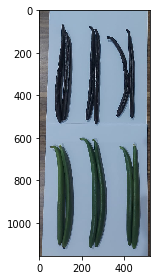

In [ ]:
chico = plt.imread('Vanili.jpeg')
imshow(chico);

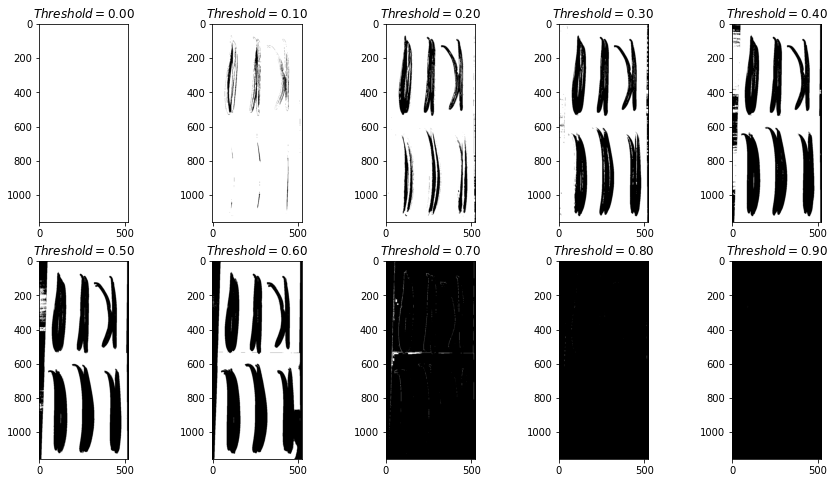

In [ ]:
th_values = np.linspace(0, 1, 11)
fig, axis = plt.subplots(2, 5, figsize=(15,8))
chico_gray = rgb2gray(chico)
for th, ax in zip(th_values, axis.flatten()):
    
    chico_binarized = chico_gray < th
    ax.imshow(chico_binarized,cmap='binary')
    ax.set_title('$Threshold = %.2f$' % th)

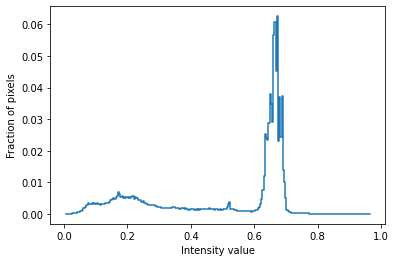

In [ ]:
freq, bins = histogram(chico_gray)
plt.step(bins, freq*1.0/freq.sum())
plt.xlabel('Intensity value')
plt.ylabel('Fraction of pixels');

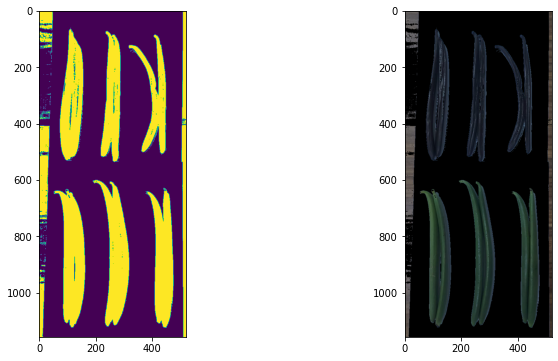

In [ ]:
def masked_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])
fig, ax = plt.subplots(1, 2, figsize=(12,6))
thresh = threshold_otsu(chico_gray)
chico_otsu  = chico_gray < thresh
ax[0].imshow(chico_otsu)
filtered = masked_image(chico, chico_otsu)
ax[1].imshow(filtered)

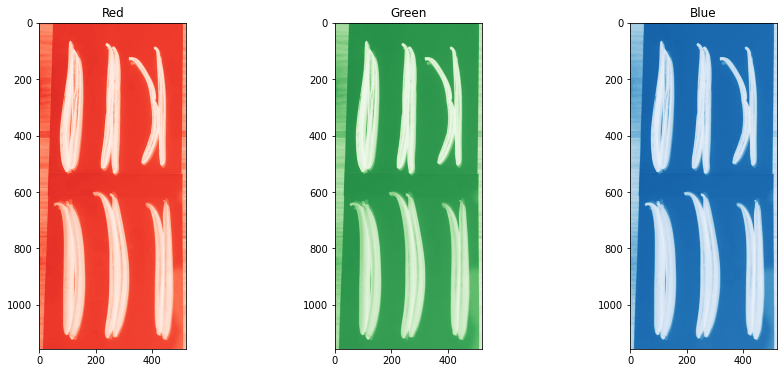

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,6))
ax[0].imshow(chico[:,:,0], cmap='Reds')
ax[0].set_title('Red')
ax[1].imshow(chico[:,:,1], cmap='Greens')
ax[1].set_title('Green')
ax[2].imshow(chico[:,:,2], cmap='Blues')
ax[2].set_title('Blue');

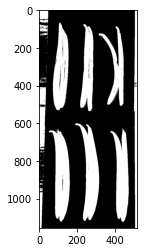

In [ ]:
import cv2

img = cv2.imread('Vanili.jpeg',0)  #0 untuk konversi ke grayscale
ret,thr = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
plt.imshow(thr,cmap='binary')
plt.show()